<a href="https://colab.research.google.com/github/sameekshya1999/NextWordPrediction/blob/main/GRU_nextword%20%20fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,Dense,GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [41]:
#Step 2: Load your file
from google.colab import files
uploaded = files.upload()

Saving cinderella.txt to cinderella (1).txt


In [42]:
#Step 3: Open and pre-process the data
file = open("cinderella.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:100]

'Cinderella: A Tale of Hope and Kindness Once upon a time, in a faraway land, there was a kind and ge'

In [43]:
len(data)

5704

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[6, 7, 131, 11, 132, 3, 67, 133, 134, 7, 68, 9, 7, 135, 136]

In [44]:
len(sequence_data)

972

In [45]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

379


In [46]:
sequences = []
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  969


array([[  6,   7, 131,  11],
       [  7, 131,  11, 132],
       [131,  11, 132,   3],
       [ 11, 132,   3,  67],
       [132,   3,  67, 133],
       [  3,  67, 133, 134],
       [ 67, 133, 134,   7],
       [133, 134,   7,  68],
       [134,   7,  68,   9],
       [  7,  68,   9,   7]])

In [47]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[  6   7 131]
 [  7 131  11]
 [131  11 132]
 [ 11 132   3]
 [132   3  67]
 [  3  67 133]
 [ 67 133 134]
 [133 134   7]
 [134   7  68]
 [  7  68   9]]
Response:  [ 11 132   3  67 133 134   7  68   9   7]


In [48]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
# Split your data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=30)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, GRU, Dropout, Dense

model = Sequential()
model.add(Input(shape=(3, )))  # Define input shape here
model.add(Embedding(vocab_size, 10))
model.add(GRU(1000, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(1000))
model.add(Dropout(0.2))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 3, 10)               │           3,790 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 3, 1000)             │       3,036,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 3, 1000)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 1000)                │       6,006,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 379)                 │         379,379 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,426,169 (39.77 MB)

 Trainable params: 10,426,169 (39.77 MB)

 Non-trainable params: 0 (0.00 B)

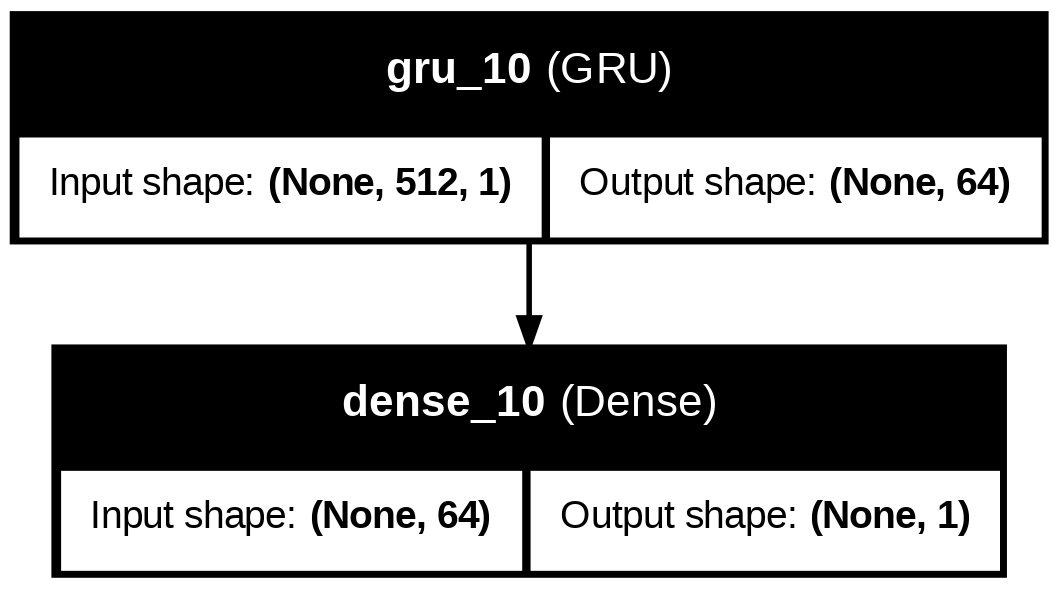

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.utils import plot_model

# Define the GRU model
gru_model = Sequential([
    GRU(64, input_shape=(512, 1)),  # Adjust units and input_shape as needed
    Dense(1)  # Add the final dense layer for output, adjust as needed
])

# Plot the model
plot_model(gru_model, to_file='plot1.png', show_layer_names=True, show_shapes=True)


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the GRU model
gru_model = Sequential([
    GRU(64, input_shape=(512, 1)),  # Adjust units and input_shape as needed
    Dense(379, activation='softmax')  # Set the output units to the number of classes with softmax activation
])

# Compile the model with categorical_crossentropy
checkpoint = ModelCheckpoint("next_words_gru.keras", monitor='loss', verbose=1, save_best_only=True)
gru_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
gru_model.fit(X_train, y_train, epochs=400, batch_size=50, callbacks=[checkpoint])


Epoch 1/400
12/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0202 - loss: 5.9867       
Epoch 1: loss improved from inf to 5.91222, saving model to next_words_gru.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0279 - loss: 5.9657
Epoch 2/400
13/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0564 - loss: 5.6597 
Epoch 2: loss improved from 5.91222 to 5.60688, saving model to next_words_gru.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0557 - loss: 5.6475
Epoch 3/400
14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0547 - loss: 5.3954 
Epoch 3: loss improved from 5.60688 to 5.34235, saving model to next_words_gru.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0549 - loss: 5.3843
Epoch 4/400
11/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0570 - loss: 5.1563 
Epoch 4: loss improved from 5.34235 to 5.13570, saving model to next_words_gru.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0577 - loss: 5.1437
Epoch 5/400
12/17 ━━━━

In [61]:
# Load the GRU model from the checkpoint
gru_model = load_model("next_words_gru.keras")

# Evaluate the GRU model on the test data
gru_test_loss, gru_test_accuracy = gru_model.evaluate(X_test, y_test)

# Print the test accuracy for the GRU model
print("GRU Test Accuracy:", gru_test_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0438 - loss: 10.4576  
GRU Test Accuracy: 0.04794520512223244


In [62]:
# Load the model and tokenizer
model = load_model('next_words_gru.keras')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: One day, an announcement was made throughout the
['made', 'throughout', 'the']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
kingdom
Enter your line: Cinderella also wished to go to the
['go', 'to', 'the']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
ball
Enter your line: Cinderella worked hard all day, finishing every task her stepmother
['task', 'her', 'stepmother']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
gave
Enter your line: The Fairy Godmother smiled warmly at Cinderella and
['at', 'Cinderella', 'and']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
said
Enter your line: But when her stepsisters saw her in the dress, they tore it to 


['it', 'to', '']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
the
Enter your line: Cinderella was hopeful as she put on the 
['on', 'the', '']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
tiny
